In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('smartphone prices.csv')
df.head()

,brand_name,model,display,front_camera,rare_camera,processor,battery_capacity,ram,internal_storage,price(€)
0,SAMSUNG,Samsung S24 Ultra,"6.8"" (120Hz)",40MP,108MP + 10MP + 10MP + 12MP,Exynos,5000 mAh,8.0,128,1810.81
1,SAMSUNG,Samsung S24 Plus,"6.6"" (120Hz)",10MP,50MP + 10MP + 12MP,Exynos,4500 mAh,8.0,128,1027.02
2,SAMSUNG,Samsung Zero,"6.41"" (120Hz)",32 MP,12 MP + 8 MP + 12 MP,Snapdragon 888 5G,4500 mAh,8.0,256,610.81
3,SAMSUNG,Samsung S24,"6.1"" (120Hz)",10MP,50MP + 10MP + 12MP,Exynos,3700 mAh,8.0,128,1351.35
4,SAMSUNG,Samsung A05s,"6.5"" (90Hz)",5MP,50MP + 2MP + 2MP,Exynos,5000 mAh,4.0,64,135.13


In [3]:
df.shape

(1256, 10)

## Data Wrangling
Um Model und Visualisierungen auf kontinuiertliche Variable problemlos durchzuführen muss man numerische Werte haben

In [4]:
#Fehlende Werte (NaN values)
df.isna().sum()

brand_name          0
model               0
display             0
front_camera        0
rare_camera         0
processor           9
battery_capacity    0
ram                 0
internal_storage    0
price(€)            0
dtype: int64

In [5]:
# hier sind nur 9 werte in der spalte processor fehlend dann werden wir sie einfach wegmachen 
df.dropna(inplace=True)

In [6]:
df.shape

(1247, 10)

In [7]:
#sich wiederholende Zeilen zeigen
df.duplicated().sum()

2

In [8]:
# sich wiederholendeZeilen entfernen
df.drop_duplicates(inplace=True)

In [9]:
# Null Werte
df.isnull().sum()

brand_name          0
model               0
display             0
front_camera        0
rare_camera         0
processor           0
battery_capacity    0
ram                 0
internal_storage    0
price(€)            0
dtype: int64

Nachdem die Methode "drop" verwendet wurde, muss der Index immer zurückgesetzt werden. Dies ist besonders wichtig, wenn Schleifen über Zeilen verwendet werden.

In [10]:
df.reset_index(drop=True, inplace=True) # drop = true um den ehemaligen Index zu entfernen

In [11]:
df.dtypes

brand_name           object
model                object
display              object
front_camera         object
rare_camera          object
processor            object
battery_capacity     object
ram                 float64
internal_storage      int64
price(€)            float64
dtype: object

In [12]:
df.columns

Index(['brand_name', 'model', 'display', 'front_camera', 'rare_camera',
       'processor', 'battery_capacity', 'ram', 'internal_storage', 'price(€)'],
      dtype='object')

In [13]:
def unique_values():
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Einzigartige Werte in Spalte '{column}':\n {unique_values}")
        print('\n')
# unique_values()

<details>
<summary>Einzigartige Werte für jede Spalte anzeigen</summary>

```python
Einzigartige Werte in Spalte 'brand_name':
 ['SAMSUNG' 'XIAOMI' 'APPLE' 'ONEPLUS' 'OPPO']


Einzigartige Werte in Spalte 'model':
 ['Samsung S24 Ultra' 'Samsung S24 Plus' 'Samsung Zero' ... 'Oppo A31'
 'Oppo Reno 4 SE' 'Oppo Reno 4 SE 256GB']


Einzigartige Werte in Spalte 'display':
 ['6.8" (120Hz)' '6.6" (120Hz)' '6.41" (120Hz)' '6.1" (120Hz)'
 '6.5" (90Hz)' '6.5"' '6.7" (120Hz)' '6.6" (90 (unconfirmed)Hz)'
 '6.7" (90Hz)' '6.4" (90Hz)' '6.5" (120Hz)' '6.6"' '6.6" (90Hz)'
 '7.6" (120Hz)' '6.7"' '6.4" (120Hz)' '6.4" (60 (International)Hz)'
 '6.55" (90Hz)' '5.8" (90Hz)' '6.4"' '7.2"' '6.1"' '6.9" (120Hz)'
 '6.2" (120Hz)' '7.5"' '6.2"' '5.14"' '6.9"' '5.7"' '10.4"' '4.6"' '6.8"'
 '6.3"' '5.0"' '5.8"' '5.9"' '7.3"' '6.0"' '5.5"' '5.6"' '4.7"' '5.2"'
 '4.0"' '5.1"' '4.5"' '4.3"' '4.8"' '8.0"' '5.3"' '6.67" (120Hz)'
 '6.58" (90Hz)' '6.6" (144Hz)' '6.55" (120Hz)' '6.43" (90Hz)'
 '6.73" (120Hz)' '6.28" (120Hz)' '6.53"' '6.71"' '6.67" (90Hz)' '6.43"'
 '6.3" (120Hz)' '6.52"' '6.47"' '6.67" (144Hz)' '6.81" (120Hz)' '8.01"'
 '6.53" (90Hz)' '11.0" (120Hz)' '6.67"' '7.1"' '6.22"' '6.39"' '6.26"'
 '10.9"' '12.9" (120Hz)' '5.4"' '5.4" (120Hz)' '10.2"' '1.78"' '7.9"'
 '10.5"' '12.9"' '11.0"' '3.5"' '6.56" (90Hz)' '6.59" (120Hz)' '6.56"'
 '6.59"' '6.49" (90Hz)' '6.62" (120Hz)' '6.52" (90Hz)' '6.55"' '6.44"'
 '6.78"' '6.41"' '6.28"' '6.01"' '6.59" (90Hz)' '6.78" (120Hz)'
 '7.1" (120Hz)' '6.43" (120Hz)' '6.51"' '6.57"' '6.42"' '6.23"']


Einzigartige Werte in Spalte 'front_camera':
 ['40MP' '10MP' '32 MP' '5MP' '8 MP' '13MP' '32MP' '8MP' '13 MP' '20 MP'
 '5 MP' '40 MP' '10 MP' '12MP' '4MP' '4 MP + 10 MP' 'Unspecified MP'
 '16 MP + 10 MP' '16 MP' '25 MP'
 'Motorized pop-up rotating main camera module' '10 MP + 8 MP'
 '10 MP + 1228 MP + 10 MP' '24 MP' '12 MP' '5 MP / 13 MP' '16 MP + 108 MP'
 '2 MP' '8 MP + 2 MP' 'VGA' '2 MP (USA)\n5 MP' '3.7 MP' '2.1 MP' '1.9 MP'
 '1.3 MP' '16MP' '20MP' 'Under-display 20 MP' 'Pop-up 20 MP'
 '20 MP + 082 MP' 'Motorized pop-up 20 MP' '7 MP' '1.2 MP' '-' 'No'
 'Unknown camera' '32 MP + 088 MP' 'Motorized pop-up 16 MP' '44MP'
 '32 MP + 32 MP' '44 MP' '16 MP + 102 MP' '16 MP + 2 MP' '44 MP + 072 MP'
 'Pop-up 16 MP' 'Pop-up 25 MP']


Einzigartige Werte in Spalte 'rare_camera':
 ['108MP + 10MP + 10MP + 12MP' '50MP + 10MP + 12MP' '12 MP + 8 MP + 12 MP'
 '50MP + 2MP + 2MP' '50MP + 2MP' '12MP + 12MP'
 '50MP + 8MP + 2MP (not confirmed)' '108MP + 13MP + 8MP + 2MP'
 '108MP + 8MP + 2MP + 2MP' '50MP + 8MP + 2MP + 2MP (not confirmed)'
 '48MP + 8MP + 5MP + 2MP' '108MP + 12MP + 5MP + 5MP'
 '64MP + 12MP + 5MP + 5MP' '50MP + 5MP + 2MP' '50MP + 13MP + 8MP + 2MP'
 '64MP + 8MP + 2MP + 2MP' '64 MP + 12 MP + 1125 MP + 5 MP'
 '50MP + 8MP + 2MP + 2MP' '13 MP + 2 MP + 2 MP' '48MP + 2MP' '8 MP'
 '13MP + 2MP' '13 MP + 2 MP' '12 MP + 64 MP + 12 MP' '108 MP + 12 MP'
 '64 MP + 12 MP + 5 MP + 5 MP' '48 MP + 8 MP + 5 MP + 2 MP'
 '12 MP + 12 MP + 12 MP' '50 MP + 5 MP + 1122 MP + 2 MP'
 '50MP + 8MP + 2MP' '50 MP + 5 MP + 2 MP + 2 MP' '50 MP + 5 MP + 2 MP'
 '13 MP' '50 MP + 8 MP + 1122 MP' '108 MP + 10 MP + 10 MP + 12 MP'
 '50 MP + 10 MP + 12 MP' '50 MP + 2 MP + 2 MP'
 '48 MP + 8 MP + 1122 MP + 2 MP' '64 MP + 12 MP + 5 MP'
 '48 MP + 8 MP + 5 MP + 5 MP' '48MP + 20MP + 16MP + 12MP'
 '64 MP + 8 MP + 1125 MP + 5 MP' '64 MP + 5 MP + 1122 MP'
 '64 MP + 8 MP + 5 MP' '64MP' '48 MP + 5 MP + 2 MP + 2 MP' '12 MP + 12 MP'
 '108 MP + 12 MP + 12 MP' '48 MP + 8 MP + 1125 MP'
 '64 MP + 8 MP + 12 MP + 5 MP' '64 MP + 8 MP + 1122 MP + 2 MP'
 '48 MP + 5 MP + 1122 MP' '64 MP + 8 MP + 5 MP + 5 MP'
 '64 MP + 12 MP + +5 MP + +5 MP'
 '108 MP (2nd gen) + 10 MP + 10 MP + 12 MP' '64 MP + 12 MP + 12 MP'
 '13 MP + 5 MP + 2 MP' '48 MP + 8 MP + 5 MP' '64 MP + 8 MP + 1125 MP'
 '108 MP + 13 MP + 12 MP' '48 MP + 8 MP + 2 MP + 2 MP'
 ' 48 MP + 8 MP + 5 MP + 5 MP' '48 MP + 8 MP + 1125 MP + 5 MP'
 '16 MP + 8 MP + 2 MP + 2 MP' '108 MP + 48 MP + 12 MP + 03 MP'
 '12 MP + 64 MP + 12 MP + 03 MP' '12 MP' '48 MP + 12 MP + 5 MP'
 '48 MP + 12 MP + 5 MP + 5 MP' '13 MP + 8 MP + 5 MP' '25 MP + 8 MP + 5 MP'
 '12 MP + 12 MP + 16 MP' '5 MP' '32 MP + 8 MP + 5 MP' '48 MP + 8 MP'
 '12 MP + 16 MP' '16 MP + 5 MP' '13 MP + 5 MP' '24 MP + 10 MP + 5 MP'
 '12 MP + 5 MP' '24 MP + 10 MP + 8 MP + 5 MP' '24 MP + 8 MP + 5 MP'
 '8 MP + 13 MP' '16 MP' '8 MP + 5 MP' '200MP + 8MP + 2MP'
 '64MP + 8MP + 2MP' '50MP + 50MP + 50MP' '50MP + 13MP + 8MP' '13MP'
 '108MP + 8MP + 2MP' '108MP + 64MP + 8MP + 52MP' '48 MP + 2 MP + 2 MP'
 '50MP + 13MP + 2MP' '50 MP + 48 MP + 48 MP'
 '108MP + 8MP + 2MP (not confirmed)' '50 MP + 13 MP + 8 MP'
 '50MP + 13MP + 5MP' '50MP + 50MP + 50MP (not confirmed)'
 '108MP + 16MP + 8MP' '64 MP + 8 MP + -2 MP' '108MP + 12MP + 5MP'
 '8 MP + 008 MP' '108MP + 8MP + 5MP' '50.3 MP + 48 MP + 48 MP'
 '200MP + 16MP + 8MP' '8 MP + 03 MP' '64 MP + 8 MP + 1122 MP + 5 MP'
 '50 MP + 2 MP' '64 MP + 8 MP + 1122 MP' '108 MP + 8 MP + 2 MP'
 '64 MP + 8 MP + 2 MP' '13 MP + 8 MP + 1125 MP + 2 MP' '50MP + 8MP'
 '108 MP + 8 MP + 13 MP' '64MP + 13MP + 2MP'
 '108 MP + 13 MP + -8 MP + 2 MP' '50 MP + 8 MP + 2 MP'
 '108 MP + 8 MP + 1125 MP' '64 MP + 8 MP + -5 MP' '108 MP + 13 MP + 5 MP'
 '64 MP + 13 MP + 2 MP' '108 MP + 8 MP + 2 MP + 2 MP'
 '50 MP + 8 MP + 2 MP + 2 MP' '108 MP + 13 MP + 1125 MP'
 '50 MP + 8 MP + 13 MP' '108 MP + 8 MP + 102 MP' '50 MP + 13 MP + 1125 MP'
 '50 MP + 50 MP + 50 MP' '50 MP + 8 MP' '64MP + 13MP + 8MP + 2MP'
 '108 MP + 8 MP + 5 MP' '108 MP + 8 MP + 1125 MP + 2 MP'
 '64 MP + 13 MP + 1125 MP' '48 MP + 8 MP + 1125 MP + 2 MP'
 '48MP (wide) + 2MP (macro) + 2MP (depth)'
 '64 MP (wide) + 8 MP (ultrawide) + 5 MP (macro)'
 '108 MP + 13 MP + 5 MP + 2 MP' '108 MP + 8 MP + 1122 MP + 2 MP'
 '64 MP + 13 MP + 102 MP + 2 MP' '48 MP + 8 MP + 1122 MP'
 '64 MP + 8 MP + 2 MP + 2 MP' '64 MP + 13 MP + 5 MP'
 '64 MP + 13 MP + 2 MP + 2 MP' '13 MP + 8 MP + 5 MP + 2 MP'
 '48 MP + 48 MP + 12 MP + 20 MP' '64 MP + 13 MP + 5 MP + 2 MP'
 '64 MP + 5 MP + 13 MP + 2 MP' '64 MP + 8 MP + 5 MP + 2 MP'
 '64 MP + 8 MP + 2 MP + 5 MP' '64 MP + 8 MP + 1125 MP + 2 MP'
 '108 MP + 13 MP + 2 MP + 2 MP' '108 MP + 12 MP + 5 MP + 20 MP'
 '12 MP + 2 MP' '48 MP + 8 MP + 13 MP' '48 MP + 12 MP' '48 MP + 5 MP'
 '48 MP + 5 MP + 12 MP + 2 MP' '48MP + 12MP + 12MP' '12 MP + 10 MP' 'No'
 '3.15 MP' '2 MP' '48MP + 8MP + 2MP' '64MP + 2MP + 2MP'
 '50MP + 48MP + 48MP' '50MP + 48MP + 8MP' '64MP + 12MP + 5MP'
 '50MP + 8MP + 50MP' '48 MP + 2 MP' '48 MP + 8 MP + 50 MP'
 '48MP + 16MP + 5MP + 2MP' '48 MP + 8 MP + 2 MP' '64 MP + 2 MP + 2 MP'
 '48 MP + 50 MP + 2 MP' '50 MP + 16 MP + 102 MP' '50 MP + 1048 MP + 2 MP'
 '48 MP + 16 MP + 105 MP + 2 MP' '48 MP + 8 MP + 50 MP + 102 MP'
 '48 MP + 16 MP + 5 MP + 2 MP' '48 MP + 8 MP + 48 MP + 5 MP'
 '48 MP + 12 MP + 16 MP' '48 MP + 8 MP + 16 MP' '48 MP'
 '16 MP + 20 MP + 16 MP' '16 MP + 20 MP' '50 MP + 13 MP + 50 MP + 3 MP'
 '8MP' '50MP + 13MP + 50MP' '16MP + 2MP (not confirmed)'
 '13MP + 2MP (not confirmed)' '64MP + 8MP + 2MP (not confirmed)'
 '48MP + 2MP + 2MP' '50MP + 12MP + 2MP (not confirmed)' '108 MP + 2 MP'
 '50 MP + 13 MP + 64 MP' '50MP + 50MP + 64MP' '50MP + 50MP + 13MP'
 '50 MP + 13 MP + 50 MP' '50 MP + 13 MP + 16 MP' '50 MP + MP + 2 MP'
 '50 MP + 13 MP + 16 MP + 102 MP' '13MP + 2MP + 2MP'
 '12MP main sensor8MP ultra-wide lens2MP portrait lense2MP portrait lense'
 '50 MP + 13 MP + 16 MP + 2 MP' '48 MP + 8 MP + 1122 MP + 1752 MP'
 '16 MP + 2 MP + 2 MP' '48 MP + 13 MP + 48 MP'
 '12 MP + 8 MP + 2 MP + 2 MP' ' 12 MP + 2 MP + 2 MP'
 '64 MP + 13 MP + 8 MP + 2 MP'
 '13MP (Telephoto) + 48MP(Primary) + 8MP(Ultrawide) + 2MP (depth))'
 '48 MP + 13 MP + 8 MP + 142 MP' '16 MP + 2 MP' 'Pop-up 16 MP + 20 MP']


Einzigartige Werte in Spalte 'processor':
 ['Exynos ' 'Snapdragon 888 5G' 'Mediatek ' ' Snapdragon' 'Snapdragon '
 'MediaTek ' 'Snapdragon 720G' ' Snapdragon 450' 'Exynos 2200 '
 'MediaTek Helio G35 ' ' Snapdragon 8 Gen 1' 'Exynos 850 ' 'MT6739W'
 'Snapdragon 778G 5G' 'Exynos 2100' ' Snapdragon 8 Gen 1 Plus'
 'MediaTek G35' ' Snapdragon 730G' 'Exynos 1200' ' Snapdragon 750G 5G'
 'Dimensity 700 5G ' 'Mediatek G80' 'Snapdragon 750G '
 ' Snapdragon 8 Gen1' 'Exynos 2100 ' 'Unisoc SC9863A '
 ' Snapdragon 865 5G' 'MediaTek G80' ' Snapdragon 778G 5G'
 ' Snapdragon 750 5G' ' Snapdragon 750' 'Snapdragon 855' 'Mediatek P35 '
 ' Snapdragon 720G' 'Exynos 9611' 'Dimensity 720 5G' 'MediaTek P35'
 'Mediatek G80 ' ' Snapdragon 888 5G' 'Exynos 850' 'Exynos 990'
 'Exynos 9611 ' 'MT6833 Dimensity 700 5G ' 'Snapdragon 750G 5G'
 'Exynos 9825 ' 'MT6853 Dimensity 720 5G ' 'Snapdragon 450'
 'Snapdragon 865+' 'MT6739WW' 'Exynos 992' 'MediaTek P65' 'Snapdragon 439'
 'Exynos 980 ' 'Snapdragon 730' 'Mediatek P65 ' 'Exynos 990 '
 'Snapdragon 820' ' Snapdragon 855+' 'Exynos 9810' 'Exynos 7904'
 'MediaTek P22' 'Exynos 7870 Octa' 'Snapdragon 675' 'Exynos 9820 '
 'Exynos 7884' 'Exynos 9820' 'Exynos 9610' 'Snapdragon 710'
 'Snapdragon 425' 'Snapdragon 660' 'Exynos 7885' 'Exynos 7570 Quad'
 'Exynos 9810 ' 'Exynos 3475 Quad' 'Exynos 8895 ' 'Snapdragon 835'
 'MediaTek P20' 'Exynos 8895' 'Snapdragon 626' 'Snapdragon 430'
 'Exynos 7880' 'Spreadtrum SC9830' 'MT6737T' 'Snapdragon 653'
 'Exynos 7420 Octa' 'Exynos 8890 Octa' 'Snapdragon 410' 'Snapdragon 625'
 'Snapdragon 617' 'Snapdragon 652' 'Exynos 7580 Octa' 'Snapdragon 615'
 ' Snapdragon 615' 'Spreadtrum' 'Snapdragon 805' '-' 'Exynos 3470 Quad'
 'Snapdragon 400' 'Snapdragon 801' ' Snapdragon 800' 'Pega-Dual +XMM6262'
 'Snapdragon 800' 'Exynos 5410 Octa' 'Snapdragon 600' 'Exynos 4412 Quad'
 ' Snapdragon 8 Gen 2' 'Dimensity 700 5G' ' Snapdragon 8+ Gen 1'
 'Mediatek Helio G99 ' 'Snapdragon 662' 'Snapdragon 8 Gen 2 '
 'Dimensity 1080' 'Dimensity 8100 ' 'Mediatek Helio G96 '
 'Mediatek Helio A22 ' 'Dimensity 1100 5G' 'Dimensity 8100 5G'
 'Dimensity 1300 5G' 'Snapdragon 730G' 'Dimensity 1200 5G '
 'MediaTek Helio G99 ' 'Dimensity 700 ' 'Mediatek Helio G95 '
 ' Snapdragon 778G+ 5G' 'Dimensity 1200 5G' 'Dimensity 810 5G '
 'Dimensity 9000 5G' 'Dimensity 8000 5G' 'Snapdragon 732G'
 ' Snapdragon 680 4G' 'Mediatek G25 ' ' Snapdragon 662'
 'Dimensity 920 5G ' ' Snapdragon 870 5G' 'MT6833 Dimensity 700 '
 'Mediatek G96 ' ' Snapdragon 695 5G' 'Snapdragon 860'
 ' Snapdragon 898 5G' 'Dimensity 920 5G' 'MediaTek G25' 'Dimensity 810 5G'
 'Snapdragon 778G' 'Snapdragon 870 5G' ' Snapdragon 888+ 5G'
 ' Snapdragon 732G' 'Mediatek G35 ' 'MediaTek G88' 'Mediatek G88 '
 'Snapdragon 480 5G' 'Dimensity 1100 5G ' ' Snapdragon 888'
 'Snapdragon 888' 'Mediatek G85' 'MediaTek G95' ' Snapdragon 860'
 'Snapdragon 732G ' 'Snapdragon 780G' 'Snapdragon 678 '
 'Dimensity 800U 5G ' ' Snapdragon 865' 'Mediatek G35' 'Snapdragon 865'
 'MT6889Z Dimensity 1000+ ' 'Mediatek G90T ' ' Snapdragon 665'
 'Snapdragon 632' 'Apple Bionic' 'Apple A15 Bionic ' 'Apple A14 Bionic '
 'Apple M2' 'Apple A14 Bionic' 'Apple A16 Bionic' 'Apple A15 Bionic'
 'Apple M1' 'Apple A14' 'Apple A13 Bionic' 'Apple A13 Bionic '
 'Apple A10 Fusion' 'Apple S5' 'Apple A12 Bionic' 'Apple A12X Bionic'
 'Apple A11 Bionic' 'Apple A10 Fusion ' 'Apple A9' 'Apple A9 ' 'Apple A8'
 'Apple A7' 'Apple A6' 'Apple A5' 'Apple A4' 'Dimensity ' 'Dimensity 810 '
 'Snapdragon 690 5G' 'Dimensity 8100-Max ' 'Dimensity 900 5G '
 ' Snapdragon 480 5G' ' Snapdragon 460' ' Snapdragon 690 5G'
 'Snapdragon 460' ' Snapdragon 765G' 'Snapdragon 845'
 'Dimensity 8100 Max 5G ' 'Dimensity 1300 5G ' 'Dimensity 8000 Max'
 'Dimensity 1200-Max 5G' 'MediaTek P95' 'MediaTek Helio P22'
 'Dimensity 1200 Max 5G' 'Dimensity 800U 5G' 'Snapdragon 768G 5G'
 'Mediatek P95 ' 'Dimensity 1000+ ' 'MediaTek P70' 'Snapdragon 765G 5G'
 'Snapdragon 665' 'MT6765V' 'MT6873V Dimensity 800 5G' 'Mediatek P90'
 'MediaTek P60' 'MediaTek P23' ' Snapdragon 435' ' Snapdragon 616'
 'Dimensity 720']


Einzigartige Werte in Spalte 'battery_capacity':
 [' 5000 mAh' ' 4500 mAh' ' 3700 mAh' ' 4400 mAh' ' 4800 mAh' ' 7000 mAh'
 ' 4000 mAh' '6000mAh' ' 3300 mAh' ' 6000 mAh' '4500mAh' '4000mAh'
 '5000mAh' '3000mAh' '4300mAh' 'Non-removable 4500 mAh' '7040mAh'
 'Non-removable 7000 mAh' 'Non-removable 3500 mAh' '-' '3300mAh' '3500mAh'
 '2600mAh' '3700mAh' '3100mAh' '4100mAh' 'Non-removable 3400 mAh'
 '3400mAh' '4380mAh' '3800mAh' '2000mAh' 'Non-removable 3300 mAh'
 '3600mAh' '2400mAh' '1500mAh' '2050mAh' '2900mAh' '1850mAh' '3050mAh'
 '2800mAh' '2550mAh' '1900mAh' '2300mAh' '3220mAh' ' 2100 mAh' '2100mAh'
 '3200mAh' '2330mAh' '4600mAh' ' 5080 mAh' ' 4700 mAh' ' 4600 mAh'
 ' 5500 mAh' ' 4860 mAh' ' 4300 mAh' ' 5260 mAh' ' 5065 mAh' ' 5020 mAh'
 ' 4520 mAh' ' 4250 mAh' ' 5160 mAh' ' 4650 mAh' ' 8720 mAh' ' 4780 mAh'
 ' 4820 mAh' '5160mAh' '4700mAh' '5020mAh' '5260mAh' '4780mAh' '4720mAh'
 ' 4323 mAh' ' 3200 mAh' ' 3279 mAh' ' 2018 mAh'
 '(28.6 Wh), non-removablemAh' ' 10758 mAh' ' 3687 mAh' ' 7538 mAh'
 ' 2438 mAh' ' 2815 mAh' ', non-removablemAh' ' 1821 mAh'
 ' (28.6 Wh), non-removablemAh' ' 3125 mAh' ' 4373 mAh' ' 3240 mAh'
 ' 2227 mAh' '1821mAh' ' 3969 mAh' ' 3046 mAh' '3110mAh' '8827mAh'
 '5124mAh' '8134mAh' 'Non-removable 9720 mAh' '7812mAh' '3174mAh'
 '2658mAh' '2942mAh' ' 2716 mAh' '2691mAh' '1960mAh' '1624mAh' '2750mAh'
 '1715mAh' '2915mAh' '1810mAh' '1560mAh' '1440mAh' '1432mAh' '1420mAh'
 '4115mAh' '4510mAh' ' 3800 mAh' ' 4230 mAh' ' 4310 mAh' ' 4350 mAh'
 ' 4025 mAh' ' 4040 mAh' ' 4015 mAh' '4015mAh' '4230mAh' '4025mAh'
 '4260mAh' '3890mAh' '4020mAh' ' 3500 mAh' 'Non-removable 4230 mAh'
 '3730mAh' '2630mAh']


Einzigartige Werte in Spalte 'ram':
 [  8.    4.    6.    3.   12.    2.    1.   16.    1.5 512.  768.   64.
 254.    0.  256.  128. ]


Einzigartige Werte in Spalte 'internal_storage':
 [ 128  256   64   32  512   16    8    4    0 1024 2048 1000]


Einzigartige Werte in Spalte 'price(€)':
 [1.81081e+03 1.02702e+03 6.10810e+02 1.35135e+03 1.35130e+02 1.59999e+03
 1.89180e+02 2.48640e+02 4.59450e+02 4.21620e+02 3.24320e+02 3.13510e+02
 4.32430e+02 2.91890e+02 2.27020e+02 2.59450e+02 3.56750e+02 2.81080e+02
 2.70260e+02 1.03783e+03 9.35130e+02 1.29720e+02 1.62162e+03 1.08100e+02
 7.02700e+02 1.56750e+02 1.72970e+02 5.13510e+02 1.51350e+02 9.99990e+02
 1.61621e+03 2.48648e+03 1.11351e+03 1.24320e+02 4.05400e+02 4.43240e+02
 1.67567e+03 1.67560e+02 1.83780e+02 2.86480e+02 2.05400e+02 2.10810e+02
 2.21620e+02 3.94590e+02 2.97290e+02 3.02700e+02 9.45940e+02 1.13513e+03
 1.18918e+03 1.45945e+03 1.56756e+03 7.48640e+02 7.89180e+02 1.00000e+02
 6.62160e+02 2.16210e+02 2.37830e+02 4.48640e+02 3.29720e+02 3.51350e+02
 3.67560e+02 3.35130e+02 4.75670e+02 5.24320e+02 3.40540e+02 1.75675e+03
 1.99990e+02 3.89180e+02 4.81080e+02 1.21620e+02 1.27030e+02 2.75670e+02
 2.32430e+02 1.08108e+03 1.70270e+03 1.40540e+02 1.23243e+03 1.62160e+02
 4.54050e+02 1.94590e+02 2.54050e+02 2.64860e+02 1.78370e+02 9.02600e+01
 9.67500e+01 8.10800e+01 9.18900e+01 1.00540e+02 1.15680e+02 1.31351e+03
 9.54050e+02 1.48650e+02 5.56750e+02 7.56700e+01 9.72970e+02 1.07026e+03
 1.13510e+02 1.02700e+02 4.27020e+02 3.78370e+02 9.24320e+02 1.22702e+03
 1.01621e+03 4.77920e+02 5.40540e+02 6.16210e+02 8.64800e+01 1.64860e+02
 9.18910e+02 7.02700e+01 4.37840e+02 4.64860e+02 2.43240e+02 1.54050e+02
 8.91890e+02 7.83780e+02 1.18910e+02 1.83783e+03 3.62160e+02 3.18920e+02
 1.35140e+02 9.73000e+01 2.00000e+02 1.78380e+02 1.08110e+02 8.64900e+01
 1.45950e+02 4.00000e+02 4.86480e+02 5.18910e+02 6.48650e+02 2.27030e+02
 4.10810e+02 2.16220e+02 2.08110e+02 9.72900e+01 5.29720e+02 5.94590e+02
 8.64860e+02 8.10810e+02 2.16000e+00 3.18910e+02 5.67560e+02 6.70260e+02
 7.40540e+02 1.04324e+03 1.10810e+03 6.48640e+02 1.51351e+03 1.57837e+03
 1.63783e+03 3.45940e+02 1.05410e+02 4.16210e+02 7.29720e+02 8.21620e+02
 4.97290e+02 9.62160e+02 7.35130e+02 7.56750e+02 7.99990e+02 5.83780e+02
 6.21620e+02 6.75670e+02 5.51350e+02 3.83780e+02 3.99990e+02 8.37800e+01
 9.45900e+01 7.45940e+02 8.43240e+02 3.72970e+02 1.07567e+03 1.12432e+03
 1.17837e+03 6.59450e+02 7.18910e+02 4.91890e+02 5.35130e+02 1.27567e+03
 1.45940e+02 8.91800e+01 8.37830e+02 8.75670e+02 1.37830e+02 8.43200e+01
 6.05400e+02 1.16210e+02 1.48640e+02 9.83780e+02 2.51891e+03 2.16216e+03
 1.25945e+03 1.72972e+03 2.21621e+03 2.37837e+03 2.54054e+03 2.70270e+03
 2.86486e+03 1.52432e+03 1.65405e+03 1.89189e+03 1.38918e+03 8.81080e+02
 1.10270e+03 9.29720e+02 9.78370e+02 1.03243e+03 1.14594e+03 1.19999e+03
 1.26486e+03 1.27026e+03 1.32972e+03 1.47567e+03 1.24324e+03 1.40540e+03
 1.53135e+03 1.62216e+03 1.86973e+03 2.12973e+03 1.62811e+03 1.74270e+03
 2.00270e+03 2.25027e+03 1.07189e+03 1.22000e+03 1.47514e+03 1.22216e+03
 1.34757e+03 1.62432e+03 1.34541e+03 1.44595e+03 1.65135e+03 1.24270e+03
 1.54865e+03 1.03784e+03 1.08919e+03 1.19189e+03 9.37840e+02 9.86490e+02
 1.21621e+03 1.30270e+03 1.16216e+03 8.97290e+02 1.70270e+02 1.43240e+02
 1.70260e+02 1.32430e+02 1.39450e+02 5.13500e+01 4.32400e+01 2.75680e+02
 7.08100e+02 5.99990e+02 5.02700e+02 5.72970e+02 6.27020e+02 6.43240e+02
 4.70260e+02 5.08100e+02 7.78370e+02 5.70260e+02 3.78380e+02 1.15135e+03
 5.62160e+02 9.67560e+02 6.37830e+02 6.91890e+02]

````

Die Spalten `brand_name`, `model`, `display`, `ram`',`internal_storage`',`` sehen gut aus. Die andere Spalten enthalten jedoch viele Details die in separate Spalten extrahiert werden sollen.

Sehen wir die Spalte `battery_capacity` genau an hier könnten wir Zwei Kategorien auflisten `non removable` und `removable`

### Neue Spalte `bttr_non_rem` hinzufügen

In [14]:
# Zeig alle Zeilen die Zeichenfolgen die 'non' oder 'Non' oder 'Non-remov' oder 'non-remov' enthalten
bttr_non_rem = df[df['battery_capacity'].str.contains('Non|non|Non-remov|non-remov')]
bttr_non_rem.shape[0]

22

Dafür werde ich df und die Spalte 'battery_capacity' von btr_non_rem zusammenbinden. Wenn die Batterie non removable gibe ich 1 als Inhalt, den Rest (die NaN values enthalten) fülle ich mit 0.

In [15]:
bttr_non_rem = bttr_non_rem.rename(columns={'battery_capacity':'bttr_non_rem'})
#bttr_non_rem.head()

##### Werte von 'bttr_non_rem' durch des 1 ausfüllen

In [16]:
# fülle die werte von 'bttr_non_rem' durch des 1 dafür benutzen wir lambda Funktion
bttr_non_rem['bttr_non_rem'] = bttr_non_rem['bttr_non_rem'].apply(lambda x:1)

##### Join Dataframe

In [17]:
df_merged = pd.merge(df, bttr_non_rem['bttr_non_rem'], left_index=True, right_index=True, how ='left')

##### NaN Werte durch 0 ausfüllen

In [18]:
df_merged.fillna(0, inplace=True)

In [19]:
df_merged.head(2)

,brand_name,model,display,front_camera,rare_camera,processor,battery_capacity,ram,internal_storage,price(€),bttr_non_rem
0,SAMSUNG,Samsung S24 Ultra,"6.8"" (120Hz)",40MP,108MP + 10MP + 10MP + 12MP,Exynos,5000 mAh,8.0,128,1810.81,0.0
1,SAMSUNG,Samsung S24 Plus,"6.6"" (120Hz)",10MP,50MP + 10MP + 12MP,Exynos,4500 mAh,8.0,128,1027.02,0.0


### Neue Spalte `battery_capacity (mAh)` einfügen

Dieser Muster extrahiert digital Ziffern aus einer Zeichenkette

In [20]:
# muster um Zahlen zu battery kapazität aus der Einheit zu extrahieren
muster = r'(\d+)'  # r: (raw string) betrachtet symbole als Zeichenketten  \d: beliebiger Ziffer (0-9) +: mehr als ein Ziffer 
df['battery_capacity (mAh)'] = df['battery_capacity'].str.extract(muster)
df.head(2)

,brand_name,model,display,front_camera,rare_camera,processor,battery_capacity,ram,internal_storage,price(€),battery_capacity (mAh)
0,SAMSUNG,Samsung S24 Ultra,"6.8"" (120Hz)",40MP,108MP + 10MP + 10MP + 12MP,Exynos,5000 mAh,8.0,128,1810.81,5000
1,SAMSUNG,Samsung S24 Plus,"6.6"" (120Hz)",10MP,50MP + 10MP + 12MP,Exynos,4500 mAh,8.0,128,1027.02,4500


#### Korrekte-datenformatierung

In [21]:
df['battery_capacity (mAh)'].dtypes

dtype('O')

In [22]:
df['battery_capacity (mAh)'] = df['battery_capacity (mAh)'].astype(float)
df['battery_capacity (mAh)'].dtypes

dtype('float64')

### Neue Spalte front_camera (mp) hinzufügen

In [23]:
muster = r'(\d+)'   
df['front_camera (mp)'] = df['front_camera'].str.extract(muster)

In [24]:
# df.head()

In [25]:
df['front_camera (mp)'].dtypes

dtype('O')

In [26]:
df['front_camera (mp)'] = df['front_camera (mp)'].astype(float)

### Neue Spalte `processor brand` einfügen

In [27]:
# Muster auf die Spalte "processor" anwenden, um die Prozessormarken zu extrahieren
df['processor brand'] = ''

for i in range(df.shape[0]):
    if len(df['processor'].str.split()) > 0:
        first_word = df['processor'].str.split(' ')[i][0]
        df.at[i, 'processor brand'] = first_word
        #print("Processormarke: ", first_word)
    else:
        df.at[i, 'processor brand'] = np.nan
        #print(NaN)

In [28]:
# df['processor'].unique()
df.tail(5)

,brand_name,model,display,front_camera,rare_camera,processor,battery_capacity,ram,internal_storage,price(€),battery_capacity (mAh),front_camera (mp),processor brand
1240,OPPO,Oppo A37,"5.0""",5 MP,8 MP,Snapdragon 410,2630mAh,2.0,16,477.92,2630.0,5.0,Snapdragon
1241,OPPO,Oppo F1,"5.0""",8 MP,13 MP,Snapdragon 616,-,3.0,16,194.59,NaN,8.0,
1242,OPPO,Oppo A31,"4.5""",5 MP,8 MP,Snapdragon 410,2000mAh,1.0,8,477.92,2000.0,5.0,Snapdragon
1243,OPPO,Oppo Reno 4 SE,"6.43""",32 MP,48 MP + 8 MP + 2 MP,Dimensity 720,4300mAh,8.0,128,477.92,4300.0,32.0,Dimensity
1244,OPPO,Oppo Reno 4 SE 256GB,"6.43""",32 MP,48 MP + 8 MP + 2 MP,Dimensity 720,4300mAh,8.0,256,477.92,4300.0,32.0,Dimensity


### disp_size (inch) und Refresh Rate (Hz) Spalten hinzufügen 

In [29]:
df['disp_size (inch)'] = ''
df['Refresh Rate (Hz)'] = ''

for i in range(df.shape[0]):
    if len(df['display'].str.split()) > 0:
        first_word = df['display'].str.split('"')[i][0]
        second_word = df['display'].str.split('"')[i][1]

        # Klammern und 'Hz' Zeichenkette entfernen
        second_word = second_word[2:-3]
        
        df.at[i, 'disp_size (inch)'] = first_word
        df.at[i, 'Refresh Rate (Hz)'] = second_word
    else:
        df.at[i, 'disp_size (inch)'] = np.nan
        df.at[i, 'Refresh Rate (Hz)'] = np.nan

In [30]:
#df['Size (Inches)'].unique()

#### Korrekte-datenformatierung

In [31]:
df['disp_size (inch)'] = df['disp_size (inch)'].astype(float)

In [32]:
df['disp_size (inch)'].dtypes

dtype('float64')

In [33]:
df['Refresh Rate (Hz)'].dtypes

dtype('O')

In [34]:
df['Refresh Rate (Hz)'].unique()

array(['120', '90', '', '90 (unconfirmed)', '60 (International)', '144'],
      dtype=object)

In [35]:
df.loc[df['Refresh Rate (Hz)'] == '90 (unconfirmed)', 'Refresh Rate (Hz)'] = 90
df.loc[df['Refresh Rate (Hz)'] == '60 (International)', 'Refresh Rate (Hz)'] = 60
df.loc[df['Refresh Rate (Hz)'] == '', 'Refresh Rate (Hz)'] = np.nan

In [36]:
df['Refresh Rate (Hz)'] = df['Refresh Rate (Hz)'].astype(float)
df['Refresh Rate (Hz)'].dtypes

dtype('float64')

In [37]:
#df.isna().sum()

<details><summary>Num of NaN Values</summary>

```python
df.isna().sum()

brand_name                 0
model                      0
display                    0
front_camera               0
rare_camera                0
processor                  0
battery_capacity           0
ram                        0
internal_storage           0
price(€)                   0
battery_capacity(mAh)     14
processor brand            0
Size (Inches)              0
Refresh Rate (Hz)        690
dtype: int64
```
</details>

In [38]:
nan_values = df[df['battery_capacity (mAh)'].isnull()]
#nan_values

In [39]:
nan_values = df[df['Refresh Rate (Hz)'].isnull()]
# nan_values.head(15)

In [40]:
df.drop('Refresh Rate (Hz)', axis=1, inplace = True)

In [41]:
df.drop('battery_capacity', axis=1, inplace = True)

In [42]:
df.drop('front_camera', axis=1, inplace =True)

In [43]:
# df.isna().sum()

<details>
<summary>Num of NaN Values</summary>

```python
df.isna().sum()
brand_name                0
model                     0
display                   0
front_camera              0
rare_camera               0
processor                 0
ram                       0
internal_storage          0
price(€)                  0
battery_capacity(mAh)    14
processor brand           0
Size (Inches)             0
</details>
```etails>
```

In [44]:
df.dropna(inplace=True)

In [45]:
df.reset_index(drop=True, inplace=True)

In [46]:
# df.isna().sum()

<details>
<summary>Num of NaN Values</summary>
    
```python
df.isna().sum()
brand_name               0
model                    0
display                  0
front_camera             0
rare_camera              0
processor                0
ram                      0
internal_storage         0
price(€)                 0
battery_capacity(mAh)    0
processor brand          0
Size (Inches)            0
dtype: int64

```
</details>

In [47]:
df.head(5)

,brand_name,model,display,rare_camera,processor,ram,internal_storage,price(€),battery_capacity (mAh),front_camera (mp),processor brand,disp_size (inch)
0,SAMSUNG,Samsung S24 Ultra,"6.8"" (120Hz)",108MP + 10MP + 10MP + 12MP,Exynos,8.0,128,1810.81,5000.0,40.0,Exynos,6.80
1,SAMSUNG,Samsung S24 Plus,"6.6"" (120Hz)",50MP + 10MP + 12MP,Exynos,8.0,128,1027.02,4500.0,10.0,Exynos,6.60
2,SAMSUNG,Samsung Zero,"6.41"" (120Hz)",12 MP + 8 MP + 12 MP,Snapdragon 888 5G,8.0,256,610.81,4500.0,32.0,Snapdragon,6.41
3,SAMSUNG,Samsung S24,"6.1"" (120Hz)",50MP + 10MP + 12MP,Exynos,8.0,128,1351.35,3700.0,10.0,Exynos,6.10
4,SAMSUNG,Samsung A05s,"6.5"" (90Hz)",50MP + 2MP + 2MP,Exynos,4.0,64,135.13,5000.0,5.0,Exynos,6.50


#### Spalten zuordnen

In [48]:
df.columns

Index(['brand_name', 'model', 'display', 'rare_camera', 'processor', 'ram',
       'internal_storage', 'price(€)', 'battery_capacity (mAh)',
       'front_camera (mp)', 'processor brand', 'disp_size (inch)'],
      dtype='object')

In [49]:
new_order = ['brand_name', 'model', 'internal_storage', 'ram',
             'battery_capacity (mAh)', 'rare_camera', 'front_camera (mp)',
             'display', 'disp_size (inch)', 'processor',
             'processor brand', 'price(€)']

In [50]:
df = df[new_order]

In [51]:
df.head()

,brand_name,model,internal_storage,ram,battery_capacity (mAh),rare_camera,front_camera (mp),display,disp_size (inch),processor,processor brand,price(€)
0,SAMSUNG,Samsung S24 Ultra,128,8.0,5000.0,108MP + 10MP + 10MP + 12MP,40.0,"6.8"" (120Hz)",6.80,Exynos,Exynos,1810.81
1,SAMSUNG,Samsung S24 Plus,128,8.0,4500.0,50MP + 10MP + 12MP,10.0,"6.6"" (120Hz)",6.60,Exynos,Exynos,1027.02
2,SAMSUNG,Samsung Zero,256,8.0,4500.0,12 MP + 8 MP + 12 MP,32.0,"6.41"" (120Hz)",6.41,Snapdragon 888 5G,Snapdragon,610.81
3,SAMSUNG,Samsung S24,128,8.0,3700.0,50MP + 10MP + 12MP,10.0,"6.1"" (120Hz)",6.10,Exynos,Exynos,1351.35
4,SAMSUNG,Samsung A05s,64,4.0,5000.0,50MP + 2MP + 2MP,5.0,"6.5"" (90Hz)",6.50,Exynos,Exynos,135.13


#### Indikatorvariable

Die Spalten 'processor brand', 'brand_name'  haben eine kleine Liste von eindeutige Werte. Regression versteht keine Wörter, sondern nur Zahlen. Um dieses Attribut in einer Regressionsanalyse zu verwenden, können wir diese Spalten in Indikatorvariablen umwandeln.

In [52]:
from sklearn.preprocessing import LabelEncoder
# Label Encoder initialisieren
le1 = LabelEncoder()
# L.E anpassen
df['brand_name (num)'] = le1.fit_transform(df['brand_name'])

# Label Encoder initialisieren
le2 = LabelEncoder()
# L.E anpassen
df['processor brand (num)'] = le2.fit_transform(df['processor brand'])

In [53]:
df1 = df[['brand_name (num)', 'model', 'internal_storage', 'ram',
             'battery_capacity (mAh)', 'rare_camera', 'front_camera (mp)',
             'display', 'disp_size (inch)', 'processor',
             'processor brand (num)', 'price(€)']]

In [54]:
df1.head()

,brand_name (num),model,internal_storage,ram,battery_capacity (mAh),rare_camera,front_camera (mp),display,disp_size (inch),processor,processor brand (num),price(€)
0,3,Samsung S24 Ultra,128,8.0,5000.0,108MP + 10MP + 10MP + 12MP,40.0,"6.8"" (120Hz)",6.80,Exynos,4,1810.81
1,3,Samsung S24 Plus,128,8.0,4500.0,50MP + 10MP + 12MP,10.0,"6.6"" (120Hz)",6.60,Exynos,4,1027.02
2,3,Samsung Zero,256,8.0,4500.0,12 MP + 8 MP + 12 MP,32.0,"6.41"" (120Hz)",6.41,Snapdragon 888 5G,16,610.81
3,3,Samsung S24,128,8.0,3700.0,50MP + 10MP + 12MP,10.0,"6.1"" (120Hz)",6.10,Exynos,4,1351.35
4,3,Samsung A05s,64,4.0,5000.0,50MP + 2MP + 2MP,5.0,"6.5"" (90Hz)",6.50,Exynos,4,135.13


## Modelierung

Als Maßmerkmal unserer Models nehmen wir r squared error:

- $R^2$ nahe 1: Das Modell erklärt einen Großteil der Variabilität der Daten. Sehr zufriedenstellend. - $R^2$2 zwischen 0,7 und 0,9: Das Modell erklärt einen signifikanten Teil der Variabilität der Daten. Gut.- $R^2$^2 zwischen 0,5 und 0,7: Das Modell erklärt einen moderaten Teil der Variabilität der Daten. Akzeptabel- $R^2$R^2 zwischen 0,3 und 0,5: Das Modell erklärt einen geringen Teil der Variabilität der Daten. Eher mäßi- $R^2$ R^2 unter 0,3: Das Modell erklärt eine sehr geringe oder keine Variabilität der Daten. Nicht zufriedenstellend.

Als Maßmerkmal unserer Models nehmen wir r squared error:
- $R^2~$ nahe 1: Das Modell erklärt einen Großteil der Variabilität der Daten. **Sehr zufriedenstellend.**
- $R^2~$ zwischen 0,7 und 0,9: Das Modell erklärt einen signifikanten Teil der Variabilität der Daten. **Gut**.
- $R^2~$ zwischen 0,5 und 0,7: Das Modell erklärt einen moderaten Teil der Variabilität der Daten. **Akzeptabel**.
- $R^2~$ zwischen 0,3 und 0,5: Das Modell erklärt einen geringen Teil der Variabilität der Daten. **Eher mäßig**.
- $R^2~$ unter 0,3: Das Modell erklärt eine sehr geringe oder keine Variabilität der Daten. **Nicht zufriedenstellend**.

#### Numerische Variable

In [55]:
df1 = df1.select_dtypes(include=['float', 'int'])

In [56]:
df1.head()

,brand_name (num),internal_storage,ram,battery_capacity (mAh),front_camera (mp),disp_size (inch),processor brand (num),price(€)
0,3,128,8.0,5000.0,40.0,6.80,4,1810.81
1,3,128,8.0,4500.0,10.0,6.60,4,1027.02
2,3,256,8.0,4500.0,32.0,6.41,16,610.81
3,3,128,8.0,3700.0,10.0,6.10,4,1351.35
4,3,64,4.0,5000.0,5.0,6.50,4,135.13


### Statistische Zusammenfassung

In [57]:
df1.describe()

,brand_name (num),internal_storage,ram,battery_capacity (mAh),front_camera (mp),disp_size (inch),processor brand (num),price(€)
count,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000
mean,2.665574,154.003279,7.975000,4386.641803,15.158197,6.452443,6.895082,479.572549
std,1.296665,143.433623,30.902112,1188.432448,9.227437,0.982359,6.472797,387.332300
min,0.000000,0.000000,1.000000,28.000000,1.000000,4.000000,0.000000,2.160000
25%,2.000000,64.000000,4.000000,3992.250000,8.000000,6.300000,2.000000,221.620000
50%,3.000000,128.000000,6.000000,4500.000000,16.000000,6.510000,4.000000,381.080000
75%,4.000000,256.000000,8.000000,5000.000000,20.000000,6.670000,14.000000,529.720000
max,4.000000,2048.000000,768.000000,10758.000000,44.000000,12.900000,18.000000,2864.860000


#### Korrelation checken

In [58]:
df1.corr()[['price(€)']]

,price(€)
brand_name (num),-0.352368
internal_storage,0.581980
ram,0.051230
battery_capacity (mAh),-0.035996
front_camera (mp),0.158492
disp_size (inch),0.279198
processor brand (num),-0.238520
price(€),1.000000


### Visual Überprüfung

In [59]:
import matplotlib.pyplot as plt 
import seaborn as sns

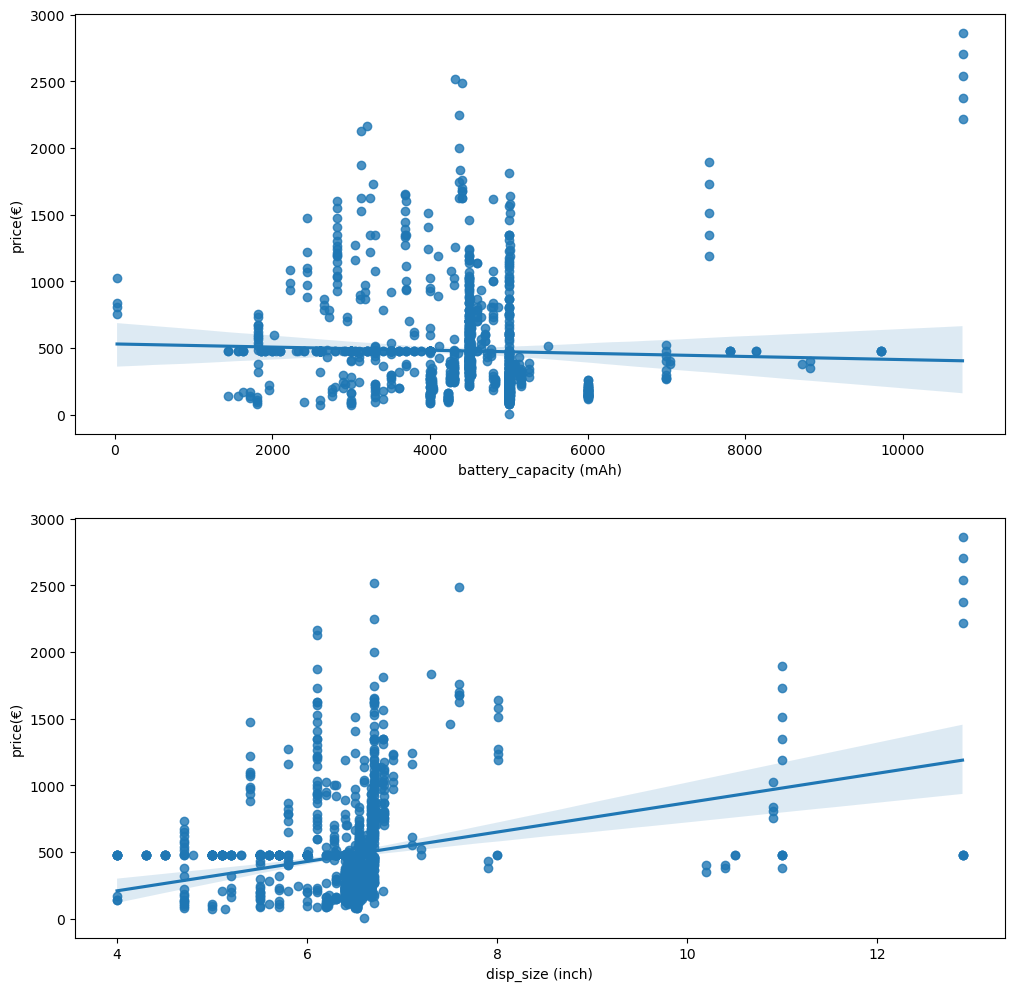

In [60]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols =1, figsize=(12, 12) )
sns.regplot(x='battery_capacity (mAh)', y='price(€)', data = df1, ax = ax1)
sns.regplot(x='disp_size (inch)', y='price(€)', data = df1, ax =ax2)
plt.show()

Anscheinend ein simple Linear Regression kann den Preis des Smartphone anhand der Akkukapazität und Bildschirmdröße nicht vorhersagen und nicht lineare Funktion wird eher anpassen


## Richtige Model aussuchen und Leistung verleichen

### 1. Simple Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression

x1 = df1[['battery_capacity (mAh)']]
x2 = df1[['disp_size (inch)']]
y = df1['price(€)']

In [62]:
# Model initialisierung
lr1 = LinearRegression()
# Model anpassen
lr1.fit(x1,y)

LinearRegression()

In [63]:
# r-squared-error
lr1.score(x1,y)

0.0012957061254436075

In [64]:
lr2 = LinearRegression()
lr2.fit(x2,y)

LinearRegression()

In [65]:
# r-aquared
lr2.score(x2,y)

0.07795130152971785

### 2. Multiple Linear Regression

##### I. Nehmen wir zwei Eigenschaften Akkukapazität und Bildschirmgröße

In [66]:
X = df1[['battery_capacity (mAh)', 'disp_size (inch)']]
y = df1['price(€)']

In [67]:
lr_mult_2 = LinearRegression()
lr_mult_2.fit(X,y)

LinearRegression()

In [68]:
# r-squared
lr_mult_2.score(X,y)

0.2072025830110752

Auch wenn wir das Modell auf alle verfügbaren Daten trainiert haben, scheint es immer noch nicht besonders gut zu funktionieren.

##### II. Nun betrachten wir alle unabhängige Variable

In [69]:
X_all = df1.drop('price(€)', axis =1)
y = df1['price(€)']

In [70]:
X_all_train, X_all_test, y_train, y_test = train_test_split(X_all, y)

In [71]:
lr_mult_all = LinearRegression()
lr_mult_all.fit(X_all_train, y_train)

LinearRegression()

In [72]:
# r-squared
lr_mult_all.score(X_all_test, y_test)

0.41912853183674015

Das Modell erklärt einen geringen Teil der Variabilität der Daten. Eher mäßig.

#### Visual Überprüfung

In [73]:
y_test_pred = lr_mult_all.predict(X_all_test)
#y_pred[0:5]

In [74]:
import warnings
# Deaktiviere die FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Dichte der tatsächlichen und vorhergesagten Preise vergleichen:

[]

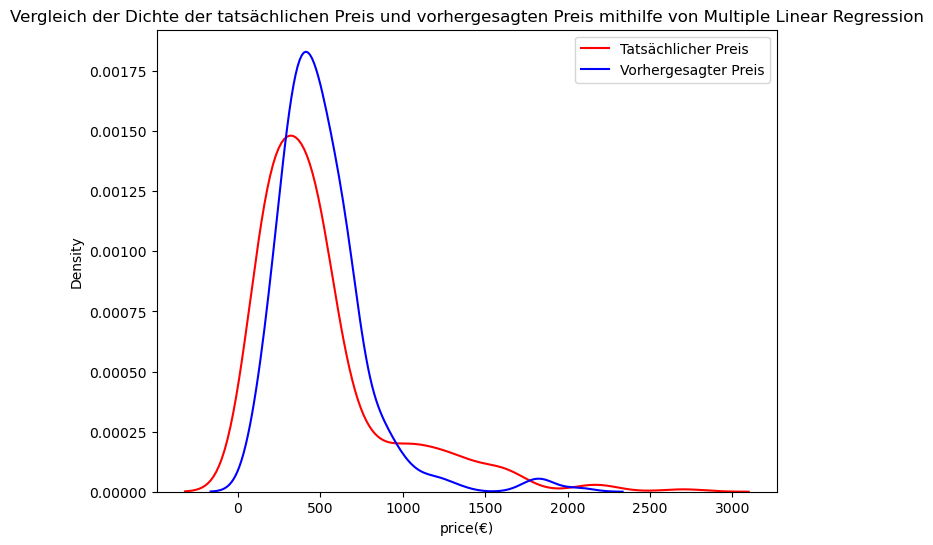

In [75]:
plt.figure(figsize=(8,6))
sns.kdeplot(y_test, color ='r', label ='Tatsächlicher Preis')
sns.kdeplot(y_test_pred, color ='b', label ='Vorhergesagter Preis')
plt.title("Vergleich der Dichte der tatsächlichen Preis und vorhergesagten Preis mithilfe von Multiple Linear Regression")
plt.legend()
plt.plot()

Wir können erkennen, dass die angepassten Werte langsam näher an die tatsächlichen Werte herankommen, Wenn wir alle unabhängige Variable in Betracht genommen haben. Aber da ist auf jeden Fall noch Platz für Verbesserungen.

### 3. Polynomial Regression

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
from sklearn.preprocessing import PolynomialFeatures

In [78]:
pr = PolynomialFeatures(degree=2)
X_all_pr = pr.fit_transform(X_all)
y = df1['price(€)']


In [79]:
# X_all_pr.shape[1]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_all_pr, y)

In [81]:
pr = PolynomialFeatures(degree=1)
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.transform(X_test)
    
# Polynomregression durchführen
coefficients, _, _, _ = np.linalg.lstsq(X_train_pr, y_train, rcond=None)
    
# Vorhersagen machen
y_test_pred = np.dot(X_test_pr, coefficients)

In [82]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_pred)
r2

-1.9016104992839251

#### Visual überprüfen

[]

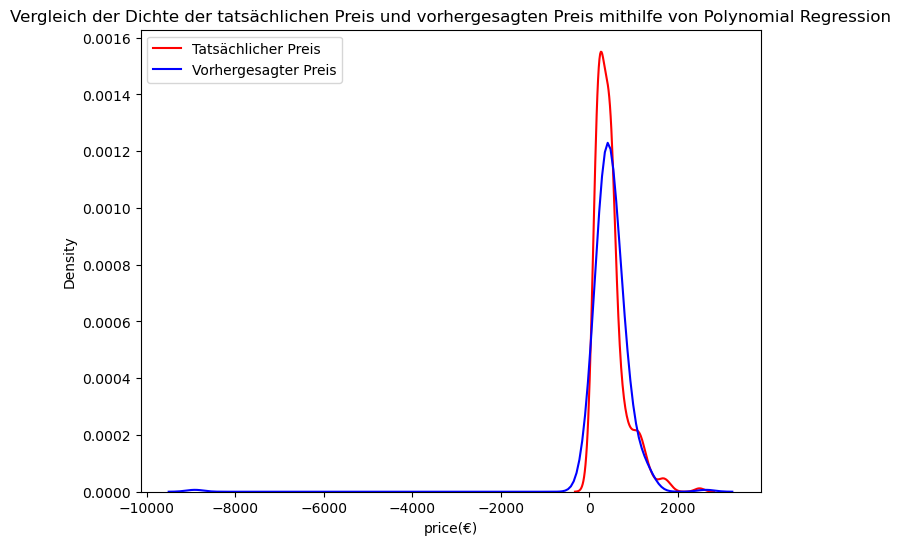

In [83]:
plt.figure(figsize=(8,6))
sns.kdeplot(y_test, color ='r', label ='Tatsächlicher Preis')
sns.kdeplot(y_test_pred, color ='b', label ='Vorhergesagter Preis')
plt.title("Vergleich der Dichte der tatsächlichen Preis und vorhergesagten Preis mithilfe von Polynomial Regression")
plt.legend()
plt.plot()

Der beste Grad für die Polynomregression ist 1, was bedeutet, dass wir wieder den multiple lineare Regression getroffen. Polynomialregression mit höheren Graden scheint nicht gut zu unseren Daten zu passen.

### XGboost

In [84]:
X_all = df1.drop('price(€)', axis =1)
y = df1['price(€)']

In [85]:
from sklearn.model_selection import train_test_split
X_all_train, X_all_test, y_train, y_test = train_test_split(X_all, y, test_size=0.25)

In [86]:
import xgboost as xgb 
xgb_r = xgb.XGBRegressor()
xgb_r.fit(X_all_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [87]:
# R-squared
xgb_r.score(X_all_test, y_test)

0.8507306321215903

In [88]:
y_test_pred = xgb_r.predict(X_all_test)

### Visual überprüfen

[]

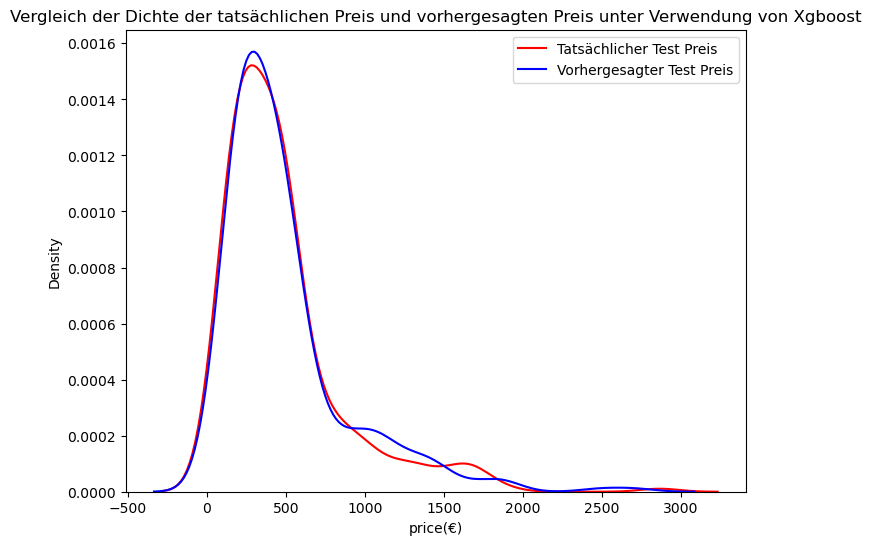

In [89]:
plt.figure(figsize=(8,6))
sns.kdeplot(y_test, color ='r', label ='Tatsächlicher Test Preis')
sns.kdeplot(y_test_pred, color ='b', label ='Vorhergesagter Test Preis')
plt.legend()
plt.title("Vergleich der Dichte der tatsächlichen Preis und vorhergesagten Preis unter Verwendung von Xgboost")
plt.plot()

Xgboost mit default parameter scheint ein guter Model für unser Data zu passen. Weil die beiden Kurven sich ziemlich überklappen

## Lassen wir uns ein paar beliebige Handys auswählen und unser Model Testen 

In [90]:
y_pred = xgb_r.predict(X_all)

"Ich werde die Indizes der Testdaten verwenden, die mein Modell nicht gelernt hat."

In [91]:
X_all_test.index

Index([ 425,  165,   47,   64,  209, 1052,  397, 1026,  977,  676,
       ...
       1120,  140,  613,  103,  725,  634,  101,  774,  261, 1037],
      dtype='int64', length=305)

In [92]:
print(df.loc[668,:])
print('\n')
print(f'Der vorhergesgter Preis lautet: {y_pred[668]} €')

brand_name                                        XIAOMI
model                      Redmi Note 10 Pro Max 8GB Ram
internal_storage                                     128
ram                                                  8.0
battery_capacity (mAh)                            5020.0
rare_camera               108 MP + 8 MP + 1125 MP + 2 MP
front_camera (mp)                                   16.0
display                                    6.67" (120Hz)
disp_size (inch)                                    6.67
processor                                Snapdragon 732G
processor brand                                         
price(€)                                          248.64
brand_name (num)                                       4
processor brand (num)                                  0
Name: 668, dtype: object


Der vorhergesgter Preis lautet: 264.7311706542969 €


In [93]:
print(df.loc[443,:])
print('\n')
print(f'Der vorhergesgter Preis lautet: {y_pred[443]} €')

brand_name                                   XIAOMI
model                     Redmi 11 Prime 5G 6GB Ram
internal_storage                                128
ram                                             6.0
battery_capacity (mAh)                       5000.0
rare_camera                            50 MP + 2 MP
front_camera (mp)                               5.0
display                                6.58" (90Hz)
disp_size (inch)                               6.58
processor                            Dimensity 700 
processor brand                           Dimensity
price(€)                                     254.05
brand_name (num)                                  4
processor brand (num)                             3
Name: 443, dtype: object


Der vorhergesgter Preis lautet: 235.0828399658203 €


In [94]:
print(df.loc[99,:])
print('\n')
print(f'Der vorhergesgter Preis lautet: {y_pred[99]} €')

brand_name                              SAMSUNG
model                      Samsung W22 5G 512GB
internal_storage                            512
ram                                        12.0
battery_capacity (mAh)                   4400.0
rare_camera               12 MP + 12 MP + 12 MP
front_camera (mp)                           4.0
display                            7.6" (120Hz)
disp_size (inch)                            7.6
processor                     Snapdragon 888 5G
processor brand                      Snapdragon
price(€)                                1756.75
brand_name (num)                              3
processor brand (num)                        16
Name: 99, dtype: object


Der vorhergesgter Preis lautet: 1714.74755859375 €
